# Business Case: INX Future Inc Employee Performance

    INX Future Inc , (referred as INX ) , is one of the leading data analytics and automation solutions provider with over 15 years of global business presence. INX is consistently rated as top 20 best employers past 5 years. INX human resource policies are considered as employee friendly and widely perceived as best practices in the industry.

    Recent years, the employee performance indexes are not healthy and this is becoming a growing concerns among the top management. There has been increased escalations on service delivery and client satisfaction levels came down by 8 percentage points.

    CEO, Mr. Brain, knows the issues but concerned to take any actions in penalizing non-performing employees as this would affect the employee morale of all the employees in general and may further reduce the performance. Also, the market perception best employer and thereby attracting best talents to join the company.

    Mr. Brain decided to initiate a data science project , which analyses the current employee data and find the core underlying causes of this performance issues. Mr. Brain, being a data scientist himself, expects the findings of this project will help him to take right course of actions. He also expects a clear indicators of non performing employees, so that any penalization of non-performing employee, if required, may not significantly affect other employee morals.

## The following insights are expected from this project
    - Department wise performances
    - Top 3 important factors effecting employee performance
    - A trained model which can predict the employee performance based on factors as inputs. This will be used to hire employees
    - Recommendations to improve the employee performance based on insights from analysis.

## Data Understanding
    The data for training the model was collected from the company INX Future Inc. The data collected included 1200 employee’s performance appraisal records, described by 28 parameters. the parameters show the different attributes of an employee based on which the prediction is to be made.

# Features present in the dataset
    1. EmpNumber
    2. Age
    3. Gender
    4. EducationBackground
    5. MaritalStatus
    6. EmpDepartment
    7. EmpJobRole
    8. BusinessTravelFrequency
    9. DistanceFromHome
    10. EmpEducationLevel
    11. EmpEnvironmentSatisfaction
    12. EmpHourlyRate
    13. EmpJobInvolvement
    14. EmpJobLevel
    15. EmpJobSatisfaction
    16. NumCompaniesWorked
    17. OverTime
    18. EmpLastSalaryHikePercent
    19. EmpRelationshipSatisfaction
    20. TotalWorkExperienceInYears
    21. TrainingTimesLastYear
    22. EmpWorkLifeBalance
    23. ExperienceYearsAtThisCompany
    24. ExperienceYearsInCurrentRole
    25. YearsSinceLastPromotion
    26. YearsWithCurrManager
    27. Attrition
    28. PerformanceRating

In [1]:
# Importing important libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Importing important libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To display all columns in dataframe
pd.set_option("display.max_columns", None)

# Importing libraries for handling categorical data
from sklearn.preprocessing import LabelEncoder

# Importing libraries for handling unbalanced datasets
from imblearn.over_sampling import SMOTE

# Importing libraries for splitting data into Train and Test sets
from sklearn.model_selection import train_test_split

# Importing libraries for feature scaling
from sklearn.preprocessing import StandardScaler

# Importing machine learning models
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier


# Importing libraries for model evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Importing library to ignore warnings
import warnings
warnings.filterwarnings('ignore')

C:\Users\PRATIK KALE\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Loading the data from excel file
df= pd.read_excel("INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls")
df

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,No,15,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,No,14,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,4,71,4,2,4,1,Yes,20,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,4,80,4,1,4,3,No,17,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,4,74,4,1,3,1,Yes,11,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,4,46,2,3,2,1,No,14,2,9,3,4,8,7,7,7,No,3


# **Basic Checks**

In [3]:
# Getting the shape of data
df.shape

(1200, 28)

- The dataset consist of **28 Columns** and **1200 Rows**

In [4]:
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,No,15,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,No,14,4,10,1,3,2,2,2,2,No,3


In [5]:
df.tail()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,4,71,4,2,4,1,Yes,20,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,4,80,4,1,4,3,No,17,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,4,74,4,1,3,1,Yes,11,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,4,46,2,3,2,1,No,14,2,9,3,4,8,7,7,7,No,3
1199,E100998,24,Female,Life Sciences,Single,Sales,Sales Executive,Travel_Rarely,3,2,1,65,3,2,3,9,No,14,1,4,3,3,2,2,2,0,Yes,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1200.0,36.918333,9.087289,18.0,30.0,36.0,43.0,60.0
DistanceFromHome,1200.0,9.165833,8.176636,1.0,2.0,7.0,14.0,29.0
EmpEducationLevel,1200.0,2.892500,1.044120,1.0,2.0,3.0,4.0,5.0
EmpEnvironmentSatisfaction,1200.0,2.715833,1.090599,1.0,2.0,3.0,4.0,4.0
EmpHourlyRate,1200.0,65.981667,20.211302,30.0,48.0,66.0,83.0,100.0
EmpJobInvolvement,1200.0,2.731667,0.707164,1.0,2.0,3.0,3.0,4.0
EmpJobLevel,1200.0,2.067500,1.107836,1.0,1.0,2.0,3.0,5.0
EmpJobSatisfaction,1200.0,2.732500,1.100888,1.0,2.0,3.0,4.0,4.0
NumCompaniesWorked,1200.0,2.665000,2.469384,0.0,1.0,2.0,4.0,9.0
EmpLastSalaryHikePercent,1200.0,15.222500,3.625918,11.0,12.0,14.0,18.0,25.0


In [8]:
df.describe(include='O')

,EmpNumber,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
count,1200,1200,1200,1200,1200,1200,1200,1200,1200
unique,1200,2,6,3,6,19,3,2,2
top,E1001000,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Rarely,No,No
freq,1,725,492,548,373,270,846,847,1022


- As data.describe(include=["O"]) tells us the unique values in the every categorical column out their

# EDA

PerformanceRating
3    874
2    194
4    132
Name: count, dtype: int64


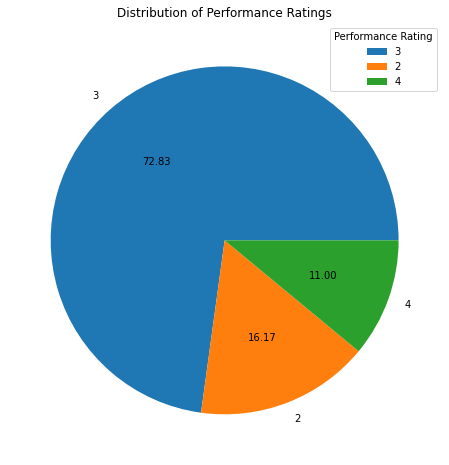

In [9]:
# Checking the value distribution of the PerformanceRating feature
performance_rating_counts = df.PerformanceRating.value_counts()

# Print the counts of each PerformanceRating value
print(performance_rating_counts)

# Plotting a pie chart to visualize the distribution of PerformanceRating values
plt.figure(figsize=(8, 8))
performance_rating_counts.plot(kind="pie", autopct="%.2f")
plt.title('Distribution of Performance Ratings')
plt.ylabel('')  # Remove y-axis label for cleaner presentation
plt.legend(performance_rating_counts.index, loc="upper right", title="Performance Rating")  # Add legend
plt.show()

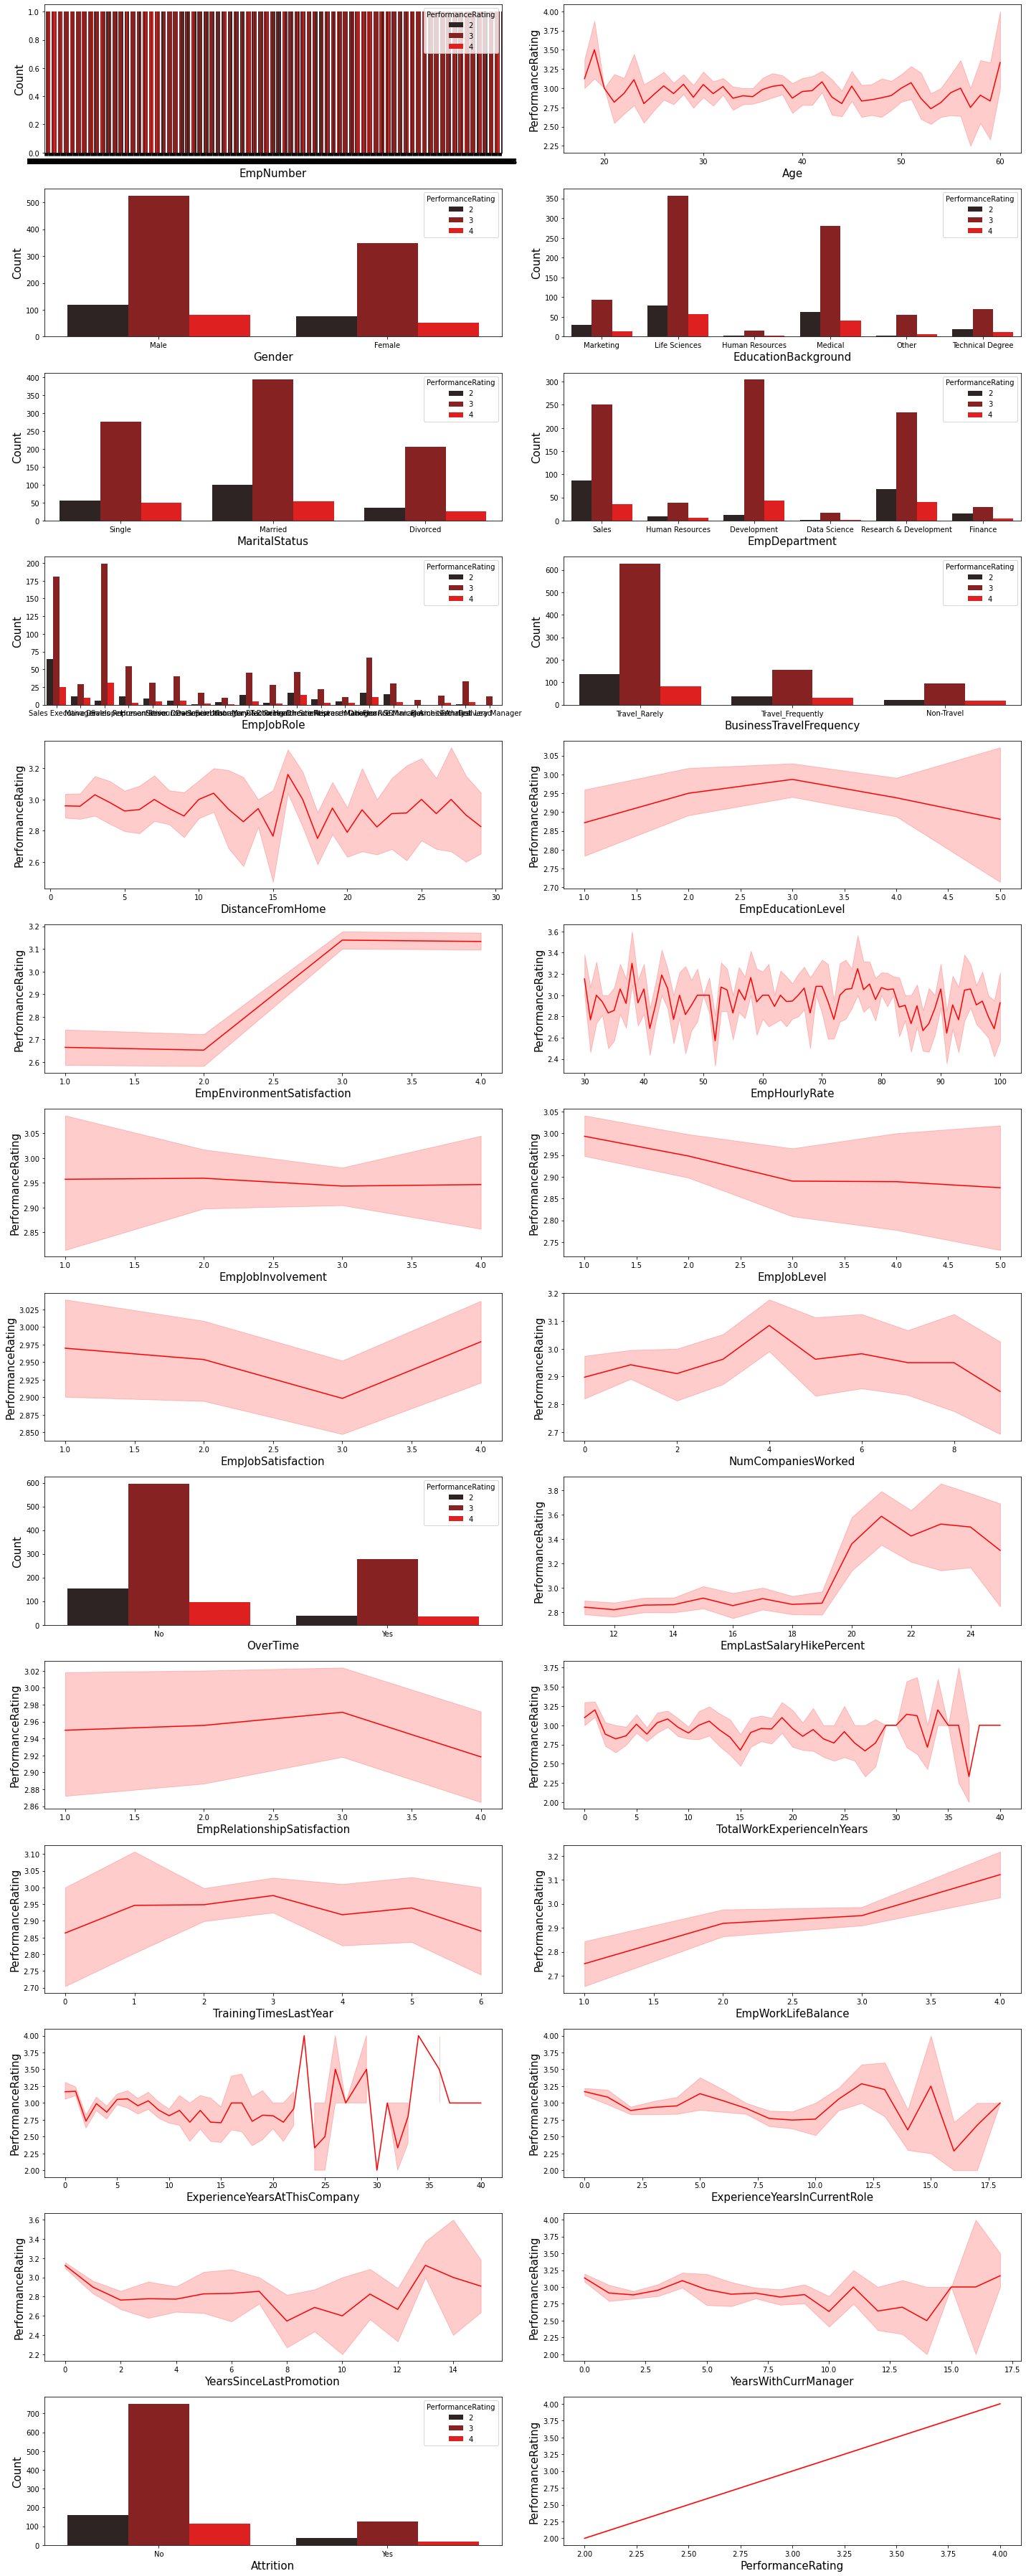

In [10]:
plt.figure(figsize=(20, 50), facecolor='white')  # Set the canvas size
plotnumber = 1  # Counter variable

for column in df.columns:  # Loop through each column in the dataset
    if plotnumber <= 28:  # Limit the number of subplots to 28 for better visualization
        ax = plt.subplot(14, 2, plotnumber)
        
        # Check if the column is categorical or continuous
        if df[column].dtype == 'object':  # Categorical variable
            sns.countplot(x=column, hue='PerformanceRating', data=df, color='red')
            plt.xlabel(column, fontsize=15)
            plt.ylabel('Count', fontsize=15)
        
        else:  # Continuous variable
            sns.lineplot(x=column, y='PerformanceRating', data=df, color='red')
            plt.xlabel(column, fontsize=15)
            plt.ylabel('PerformanceRating', fontsize=15)
        
        plotnumber += 1  # Increment the counter

plt.tight_layout()
plt.show()

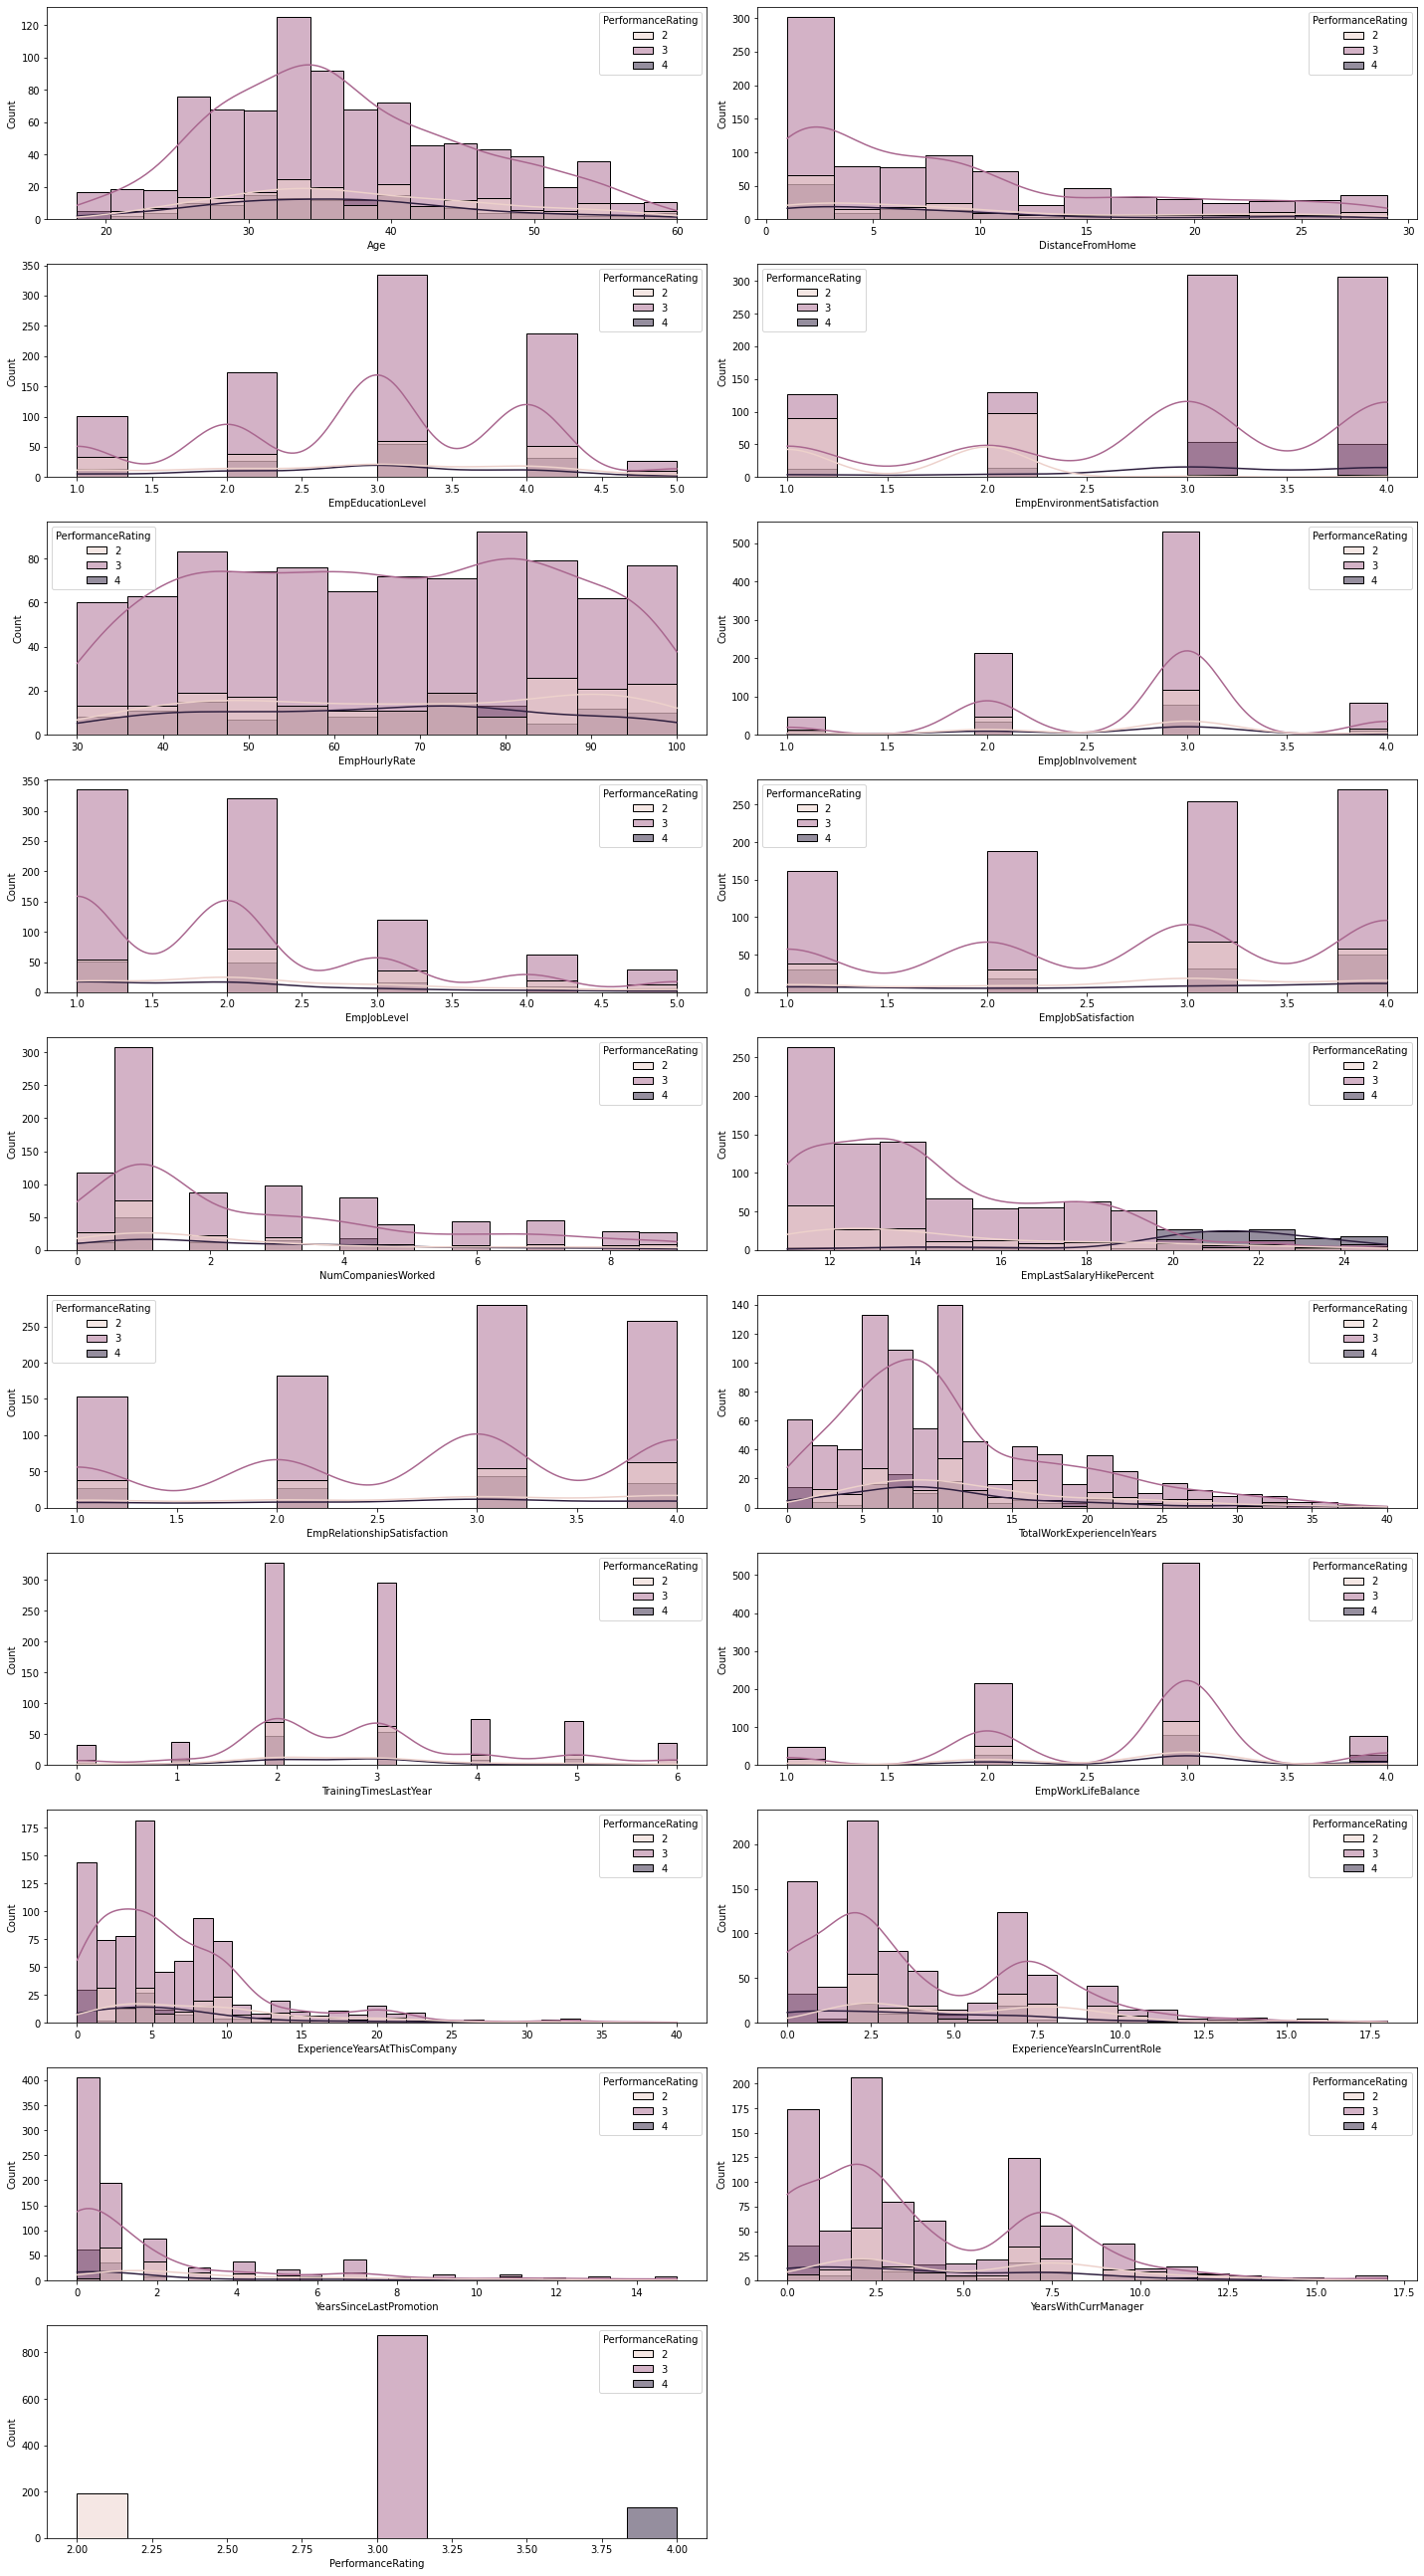

In [11]:
# checking the data distribution

# Set the figure size and background color
plt.figure(figsize=(20, 50), facecolor="white")

# Initialize subplot counter and get numerical columns for plotting
plot = 1
columns_to_plot = df.select_dtypes(include=['int']).columns

# Loop through each numerical column for plotting
for column in columns_to_plot:
    # Check if there are still available subplots
    if plot <= 28:
        # Create a subplot
        plt.subplot(14, 2, plot)
        
        # Plot histogram with kernel density estimation (kde) and color by PerformanceRating
        sns.histplot(x=df[column], hue=df.PerformanceRating, color='red', kde=True)
        
        # Increment subplot counter
        plot += 1

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Task 1: Department wise performances

In [12]:
# Group data by 'EmpDepartment' and calculate the mean PerformanceRating for each department
mean_performance_by_department = df.groupby('EmpDepartment')['PerformanceRating'].mean().reset_index()

# Sort the DataFrame in ascending order based on the mean PerformanceRating
mean_performance_by_department_sorted = mean_performance_by_department.sort_values(by='PerformanceRating', ascending=False, ignore_index=True)

# Display the sorted DataFrame
print(mean_performance_by_department_sorted)

            EmpDepartment  PerformanceRating
0             Development           3.085873
1            Data Science           3.050000
2         Human Resources           2.925926
3  Research & Development           2.921283
4                   Sales           2.860590
5                 Finance           2.775510


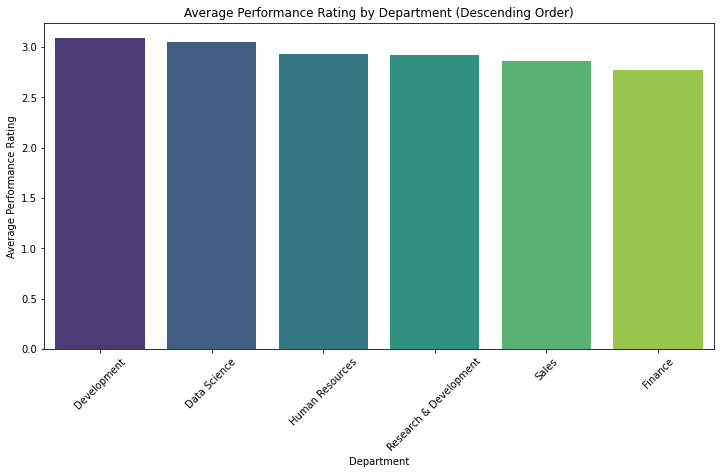

In [13]:
# Extract relevant columns from the dataset
department_performance = df[['EmpDepartment', 'PerformanceRating']]

# Group by department and calculate the average performance rating
avg_performance_by_department = department_performance.groupby('EmpDepartment')['PerformanceRating'].mean().reset_index()

# Sort the DataFrame in descending order based on the average PerformanceRating
avg_performance_by_department_sorted = avg_performance_by_department.sort_values(by='PerformanceRating', ascending=False)

# Visualize department-wise performance using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='EmpDepartment', y='PerformanceRating', data=avg_performance_by_department_sorted, palette='viridis')

# Set plot title and axis labels
plt.title('Average Performance Rating by Department (Descending Order)')
plt.xlabel('Department')
plt.ylabel('Average Performance Rating')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [14]:
# Group data by 'EmpDepartment' and 'PerformanceRating', and count the occurrences
department_performance_counts = df.groupby(by='EmpDepartment')['PerformanceRating'].value_counts()

# Display the resulting Series showing the count of each Performance Rating for each Employee Department
print(department_performance_counts)

EmpDepartment           PerformanceRating
Data Science            3                     17
                        4                      2
                        2                      1
Development             3                    304
                        4                     44
                        2                     13
Finance                 3                     30
                        2                     15
                        4                      4
Human Resources         3                     38
                        2                     10
                        4                      6
Research & Development  3                    234
                        2                     68
                        4                     41
Sales                   3                    251
                        2                     87
                        4                     35
Name: count, dtype: int64


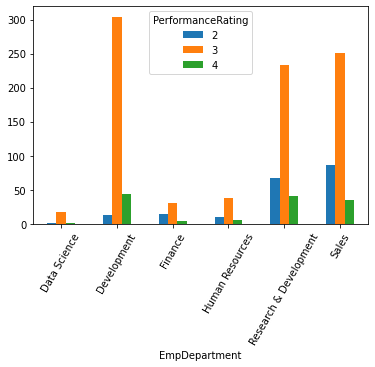

In [15]:
# Group data by 'EmpDepartment' and count the occurrences of each 'PerformanceRating'
department_performance_counts = df.groupby('EmpDepartment')['PerformanceRating'].value_counts().unstack()

# Plot a bar chart to visualize the distribution of Performance Ratings for each Employee Department
department_performance_counts.plot(kind='bar')

# Rotate x-axis labels for better readability
plt.xticks(rotation=60)

# Display the plot
plt.show()

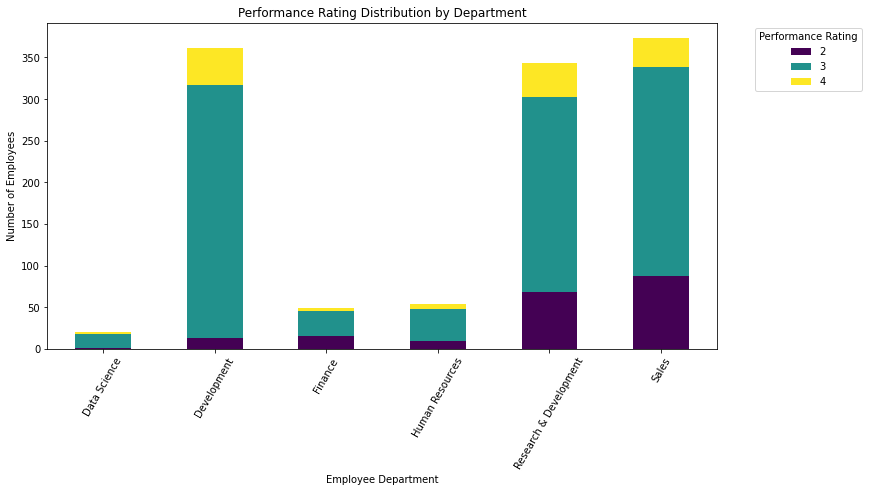

In [16]:
# Group data by 'EmpDepartment' and count the occurrences of each 'PerformanceRating'
department_performance_counts = df.groupby('EmpDepartment')['PerformanceRating'].value_counts().unstack()

# Plot a bar chart to visualize the distribution of Performance Ratings for each Employee Department
ax = department_performance_counts.plot(kind='bar', stacked=True, figsize=(12, 6), cmap='viridis')

# Set plot title and axis labels
plt.title('Performance Rating Distribution by Department')
plt.xlabel('Employee Department')
plt.ylabel('Number of Employees')

# Rotate x-axis labels for better readability
plt.xticks(rotation=60)

# Add a legend for performance ratings
plt.legend(title='Performance Rating', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()

In [17]:
# Group data by 'EmpJobRole' and calculate the mean PerformanceRating for each job role
mean_performance_by_job_role = df.groupby('EmpJobRole')['PerformanceRating'].mean().reset_index()

# Sort the DataFrame in descending order based on the mean PerformanceRating
mean_performance_by_job_role_sorted = mean_performance_by_job_role.sort_values(by='PerformanceRating', ascending=False, ignore_index=True)

# Display the resulting DataFrame showing the mean PerformanceRating for each Employee Job Role
print(mean_performance_by_job_role_sorted)

                   EmpJobRole  PerformanceRating
0            Business Analyst           3.187500
1                   Developer           3.105932
2              Technical Lead           3.078947
3              Data Scientist           3.050000
4            Delivery Manager           3.000000
5            Senior Developer           3.000000
6         Technical Architect           3.000000
7      Manufacturing Director           2.969697
8          Research Scientist           2.961039
9                     Manager           2.960784
10                Manager R&D           2.936170
11            Human Resources           2.911111
12          Research Director           2.894737
13       Sales Representative           2.869565
14      Laboratory Technician           2.859375
15            Sales Executive           2.855556
16  Healthcare Representative           2.848485
17         Senior Manager R&D           2.800000
18            Finance Manager           2.775510


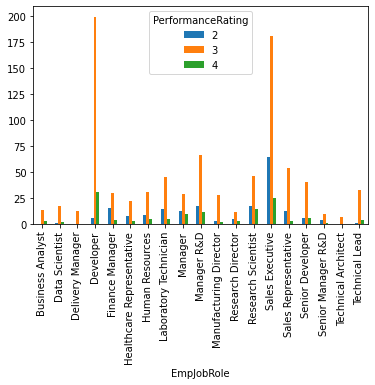

In [18]:
# Group data by 'EmpJobRole' and count the occurrences of each 'PerformanceRating'
rating_counts = df.groupby('EmpJobRole')['PerformanceRating'].value_counts().unstack()

# Plot a bar chart to visualize the distribution of Performance Ratings for each Employee Job Role
rating_counts.plot(kind='bar')

# Display the plot
plt.show()

In [19]:
# Group data by 'EmpEnvironmentSatisfaction' and calculate the mean PerformanceRating for each satisfaction level
mean_performance_by_environment_satisfaction = df.groupby('EmpEnvironmentSatisfaction')['PerformanceRating'].mean().reset_index()

# Sort the DataFrame by 'EmpEnvironmentSatisfaction'
mean_performance_by_environment_satisfaction_sorted = mean_performance_by_environment_satisfaction.sort_values(by='EmpEnvironmentSatisfaction')

# Display the resulting DataFrame showing the mean PerformanceRating for each Employee Environment Satisfaction level
print(mean_performance_by_environment_satisfaction_sorted)

   EmpEnvironmentSatisfaction  PerformanceRating
0                           1           2.665217
1                           2           2.652893
2                           3           3.138965
3                           4           3.132964


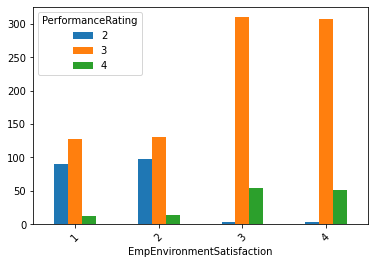

In [20]:
# Group data by 'EmpEnvironmentSatisfaction' and count the occurrences of each 'PerformanceRating'
environment_satisfaction_counts = df.groupby('EmpEnvironmentSatisfaction')['PerformanceRating'].value_counts().unstack()

# Plot a bar chart to visualize the distribution of Performance Ratings for each Employee Environment Satisfaction level
environment_satisfaction_counts.plot(kind='bar')

# Display the plot
plt.xticks(rotation=45)
plt.show()

In [21]:
# Group data by 'EmpLastSalaryHikePercent' and calculate the mean PerformanceRating for each salary hike percentage
mean_performance_by_salary_hike_percent = df.groupby('EmpLastSalaryHikePercent')['PerformanceRating'].mean().reset_index()

# Sort the DataFrame by 'EmpLastSalaryHikePercent'
mean_performance_by_salary_hike_percent_sorted = mean_performance_by_salary_hike_percent.sort_values(by='EmpLastSalaryHikePercent')

# Display the resulting DataFrame showing the mean PerformanceRating for each Employee's Last Salary Hike Percentage
print(mean_performance_by_salary_hike_percent_sorted)

    EmpLastSalaryHikePercent  PerformanceRating
0                         11           2.840237
1                         12           2.819355
2                         13           2.857143
3                         14           2.860465
4                         15           2.914634
5                         16           2.852941
6                         17           2.910448
7                         18           2.863014
8                         19           2.873016
9                         20           3.360000
10                        21           3.588235
11                        22           3.425532
12                        23           3.523810
13                        24           3.500000
14                        25           3.307692


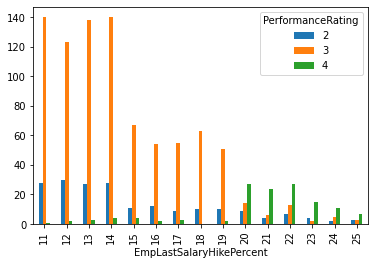

In [22]:
# Group data by 'EmpLastSalaryHikePercent' and count the occurrences of each 'PerformanceRating'
salary_hike_percent_counts = df.groupby('EmpLastSalaryHikePercent')['PerformanceRating'].value_counts().unstack()

# Plot a bar chart to visualize the distribution of Performance Ratings for each Employee's Last Salary Hike Percentage
salary_hike_percent_counts.plot(kind='bar')

# Display the plot
plt.show()

In [23]:
# Group data by 'YearsSinceLastPromotion' and calculate the mean PerformanceRating for each number of years since last promotion
mean_performance_by_years_since_promotion = df.groupby('YearsSinceLastPromotion')['PerformanceRating'].mean().reset_index()

# Sort the DataFrame by 'YearsSinceLastPromotion'
mean_performance_by_years_since_promotion_sorted = mean_performance_by_years_since_promotion.sort_values(by='YearsSinceLastPromotion')

# Display the resulting DataFrame showing the mean PerformanceRating for each number of Years Since Last Promotion
print(mean_performance_by_years_since_promotion_sorted)

    YearsSinceLastPromotion  PerformanceRating
0                         0           3.123667
1                         1           2.898990
2                         2           2.763780
3                         3           2.777778
4                         4           2.773585
5                         5           2.828571
6                         6           2.833333
7                         7           2.854839
8                         8           2.545455
9                         9           2.687500
10                       10           2.600000
11                       11           2.826087
12                       12           2.666667
13                       13           3.125000
14                       14           3.000000
15                       15           2.909091


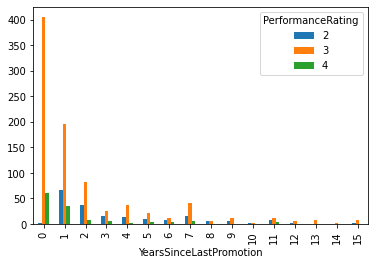

In [24]:
# Group data by 'YearsSinceLastPromotion' and count the occurrences of each 'PerformanceRating'
promotion_years_counts = df.groupby('YearsSinceLastPromotion')['PerformanceRating'].value_counts().unstack()

# Plot a bar chart to visualize the distribution of Performance Ratings for each number of years since last promotion
promotion_years_counts.plot(kind='bar')

# Display the plot
plt.show()

# Data Preprocessing

In [25]:
# drop EmpNumber: the employee Number works as a unique identification key for each employee 
# this column and will not provide valuable insights to the analysis.

df.drop('EmpNumber',axis=1,inplace=True)

In [26]:
df

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
1,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3
2,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4
3,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,No,15,2,23,2,2,21,6,12,6,No,3
4,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,No,14,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,4,71,4,2,4,1,Yes,20,2,6,3,3,6,5,0,4,No,4
1196,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,4,80,4,1,4,3,No,17,1,4,2,3,1,0,0,0,No,3
1197,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,4,74,4,1,3,1,Yes,11,3,20,3,3,20,8,3,8,No,3
1198,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,4,46,2,3,2,1,No,14,2,9,3,4,8,7,7,7,No,3


# 1) Check null values

In [27]:
df.isna().sum()

Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

# 2) check duplicated

In [28]:
df.duplicated().sum()

0

### Conversion of Categorical variables

In [29]:
# Create a new dataframe with categorical variables only(Check the datatype by using info function)
data1=df[['Gender','EducationBackground','MaritalStatus','EmpDepartment','EmpJobRole','BusinessTravelFrequency','OverTime','Attrition']]
data1

,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
0,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
1,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
2,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,Yes,No
3,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,No,No
4,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
...,...,...,...,...,...,...,...,...
1195,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,Yes,No
1196,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,No,No
1197,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,Yes,No
1198,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,No,No


# 3) Encoding

In [30]:
# Using label encoding
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
for column in data1:
    df[column]=lb.fit_transform(data1[column])

In [31]:
df['PerformanceRating']=lb.fit_transform(df['PerformanceRating'])
df

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,1,2,2,5,13,2,10,3,4,55,3,2,4,1,0,12,4,10,2,2,10,7,0,8,0,1
1,47,1,2,2,5,13,2,14,4,4,42,3,2,1,2,0,12,4,20,2,3,7,7,1,7,0,1
2,40,1,1,1,5,13,1,5,4,4,48,2,3,1,5,1,21,3,20,2,3,18,13,1,12,0,2
3,41,1,0,0,3,8,2,10,4,2,73,2,5,4,3,0,15,2,23,2,2,21,6,12,6,0,1
4,60,1,2,2,5,13,2,16,4,1,84,3,2,1,8,0,14,4,10,1,3,2,2,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,27,0,3,0,5,13,1,3,1,4,71,4,2,4,1,1,20,2,6,3,3,6,5,0,4,0,2
1196,37,1,1,2,1,15,2,10,2,4,80,4,1,4,3,0,17,1,4,2,3,1,0,0,0,0,1
1197,50,1,3,1,1,15,2,28,1,4,74,4,1,3,1,1,11,3,20,3,3,20,8,3,8,0,1
1198,34,0,3,2,0,1,2,9,3,4,46,2,3,2,1,0,14,2,9,3,4,8,7,7,7,0,1


All the categorical features have been converted to numerical features using label encoder.

# 4)Checking Outliers

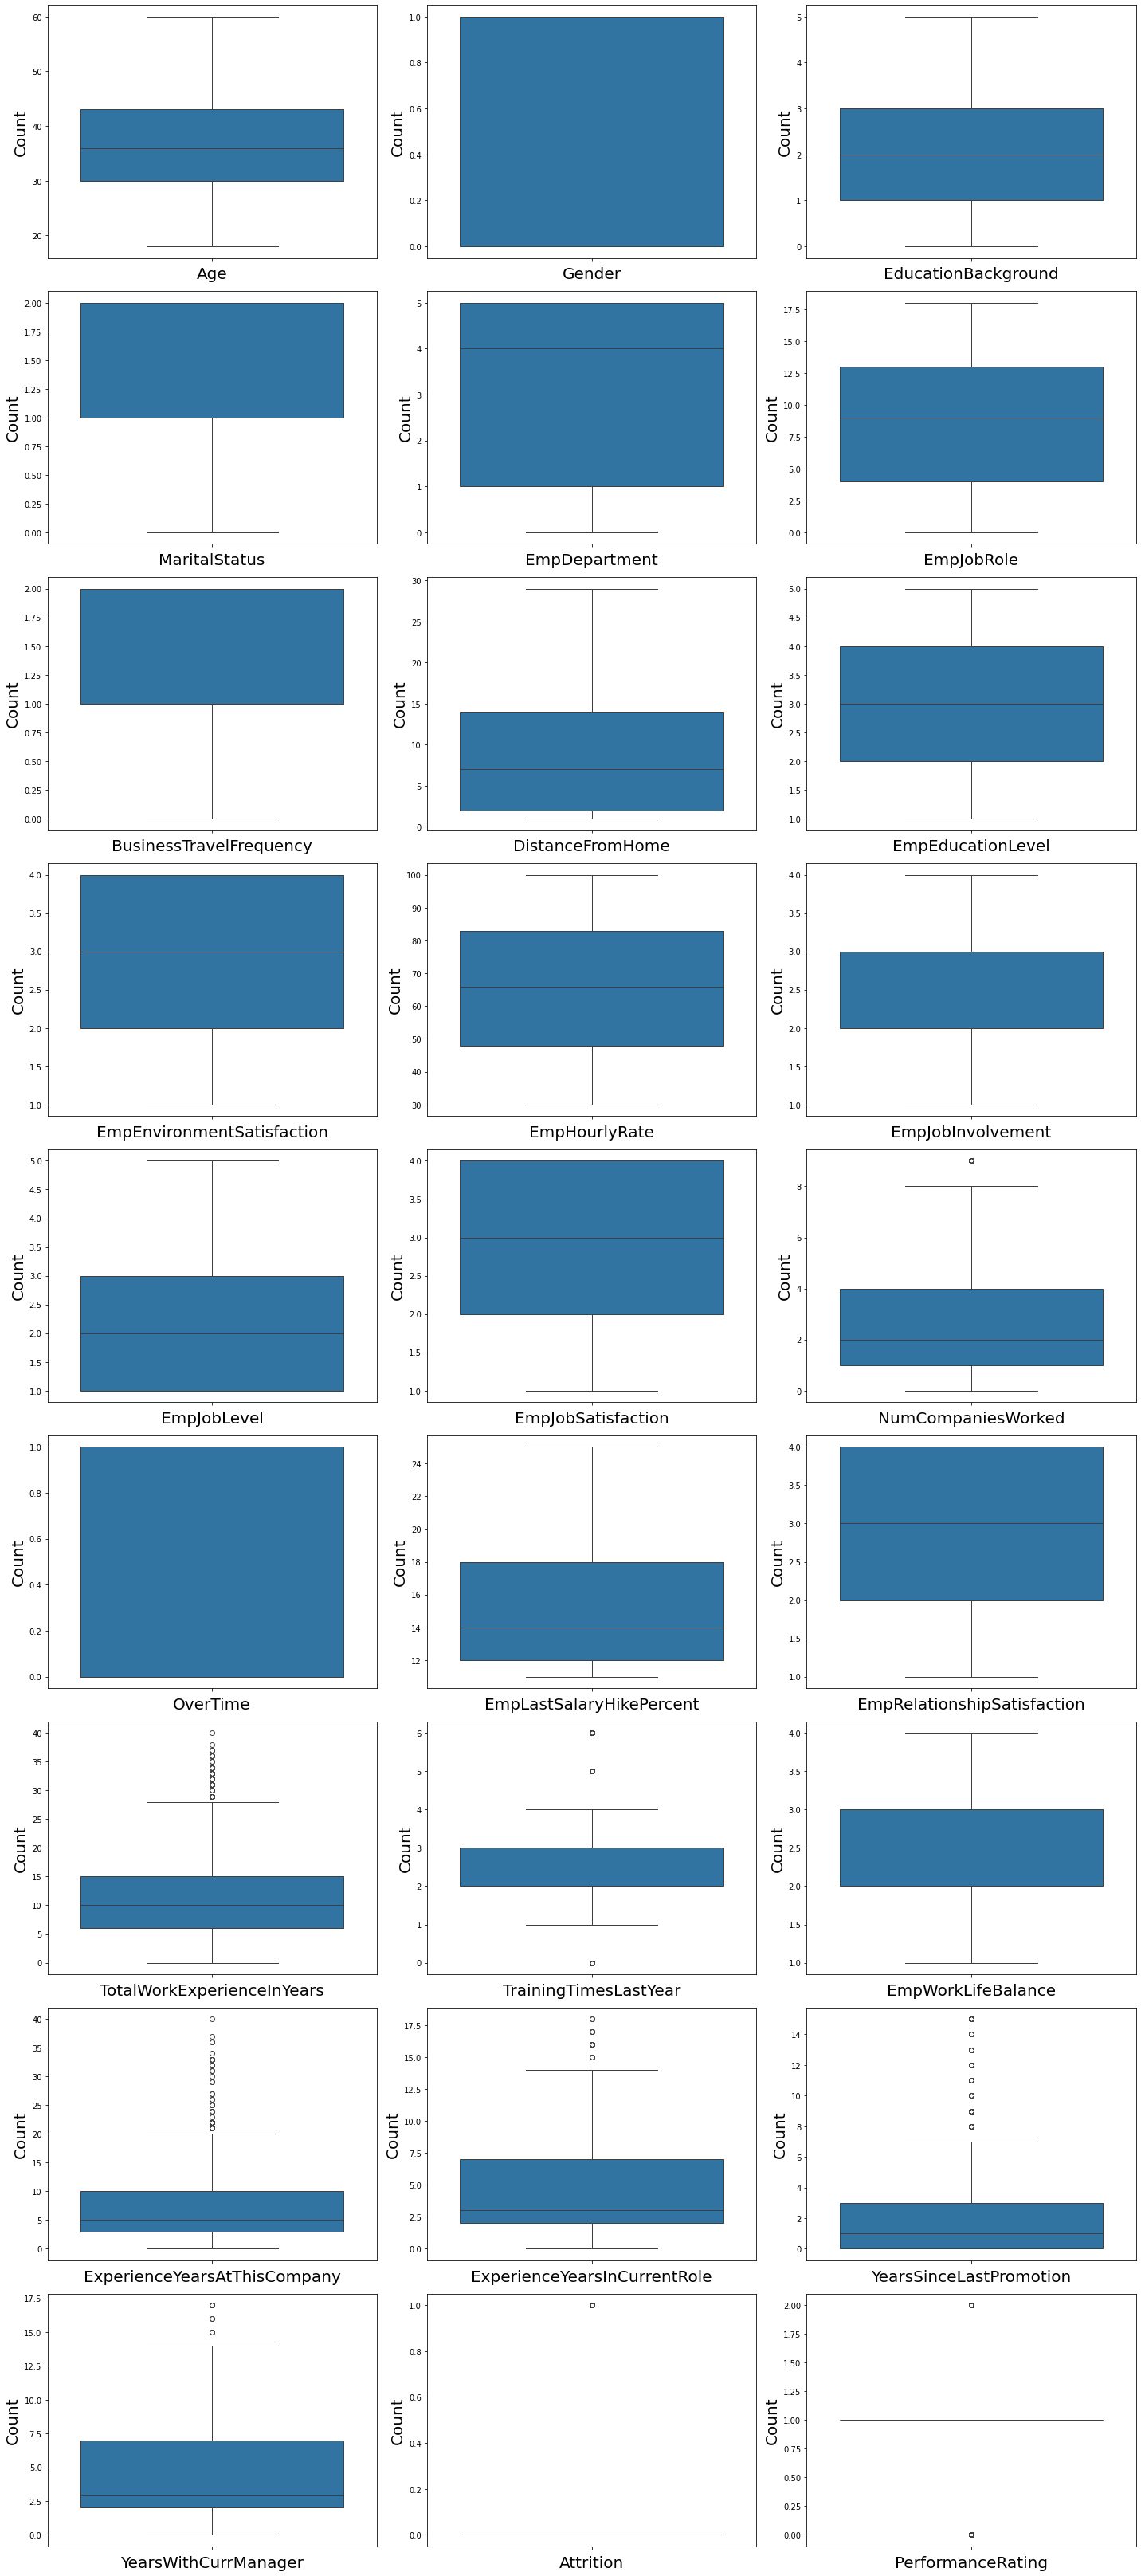

In [32]:
plt.figure(figsize=(20,45),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=27:
        ax=plt.subplot(9,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [33]:
# Selecting only the important columns for analysis
x = df.drop('PerformanceRating', axis=1)
y = df.PerformanceRating

In [34]:
from scipy import stats  # Make sure to import the necessary libraries

col = 1
for c in x:  # Assuming df1 is your DataFrame
    if col <=19:
        IQR = stats.iqr(x[c], interpolation='midpoint')
        print(c, 'IQR:', IQR)
        Q1 = x[c].quantile(0.25)
        Q3 = x[c].quantile(0.75)
        min_limit = Q1 - 1.5 * IQR
        print(c, 'min_limit:', min_limit)
        max_limit = Q3 + 1.5 * IQR
        print(c, 'max_limit:', max_limit, '\n')

        # Replace outliers with the median
        x.loc[(x[c] < min_limit) | (x[c] > max_limit), c] = np.median(x[c])

        # Double-check if outliers are replaced
        replaced_outliers = x.loc[(x[c] < min_limit) | (x[c] > max_limit), c]
        print(f"Replaced outliers in {c}:", replaced_outliers, '\n')
    
    col += 1

Age IQR: 13.0
Age min_limit: 10.5
Age max_limit: 62.5 

Replaced outliers in Age: Series([], Name: Age, dtype: int64) 

Gender IQR: 1.0
Gender min_limit: -1.5
Gender max_limit: 2.5 

Replaced outliers in Gender: Series([], Name: Gender, dtype: int32) 

EducationBackground IQR: 2.0
EducationBackground min_limit: -2.0
EducationBackground max_limit: 6.0 

Replaced outliers in EducationBackground: Series([], Name: EducationBackground, dtype: int32) 

MaritalStatus IQR: 1.0
MaritalStatus min_limit: -0.5
MaritalStatus max_limit: 3.5 

Replaced outliers in MaritalStatus: Series([], Name: MaritalStatus, dtype: int32) 

EmpDepartment IQR: 4.0
EmpDepartment min_limit: -5.0
EmpDepartment max_limit: 11.0 

Replaced outliers in EmpDepartment: Series([], Name: EmpDepartment, dtype: int32) 

EmpJobRole IQR: 9.0
EmpJobRole min_limit: -9.5
EmpJobRole max_limit: 26.5 

Replaced outliers in EmpJobRole: Series([], Name: EmpJobRole, dtype: int32) 

BusinessTravelFrequency IQR: 1.0
BusinessTravelFrequency m

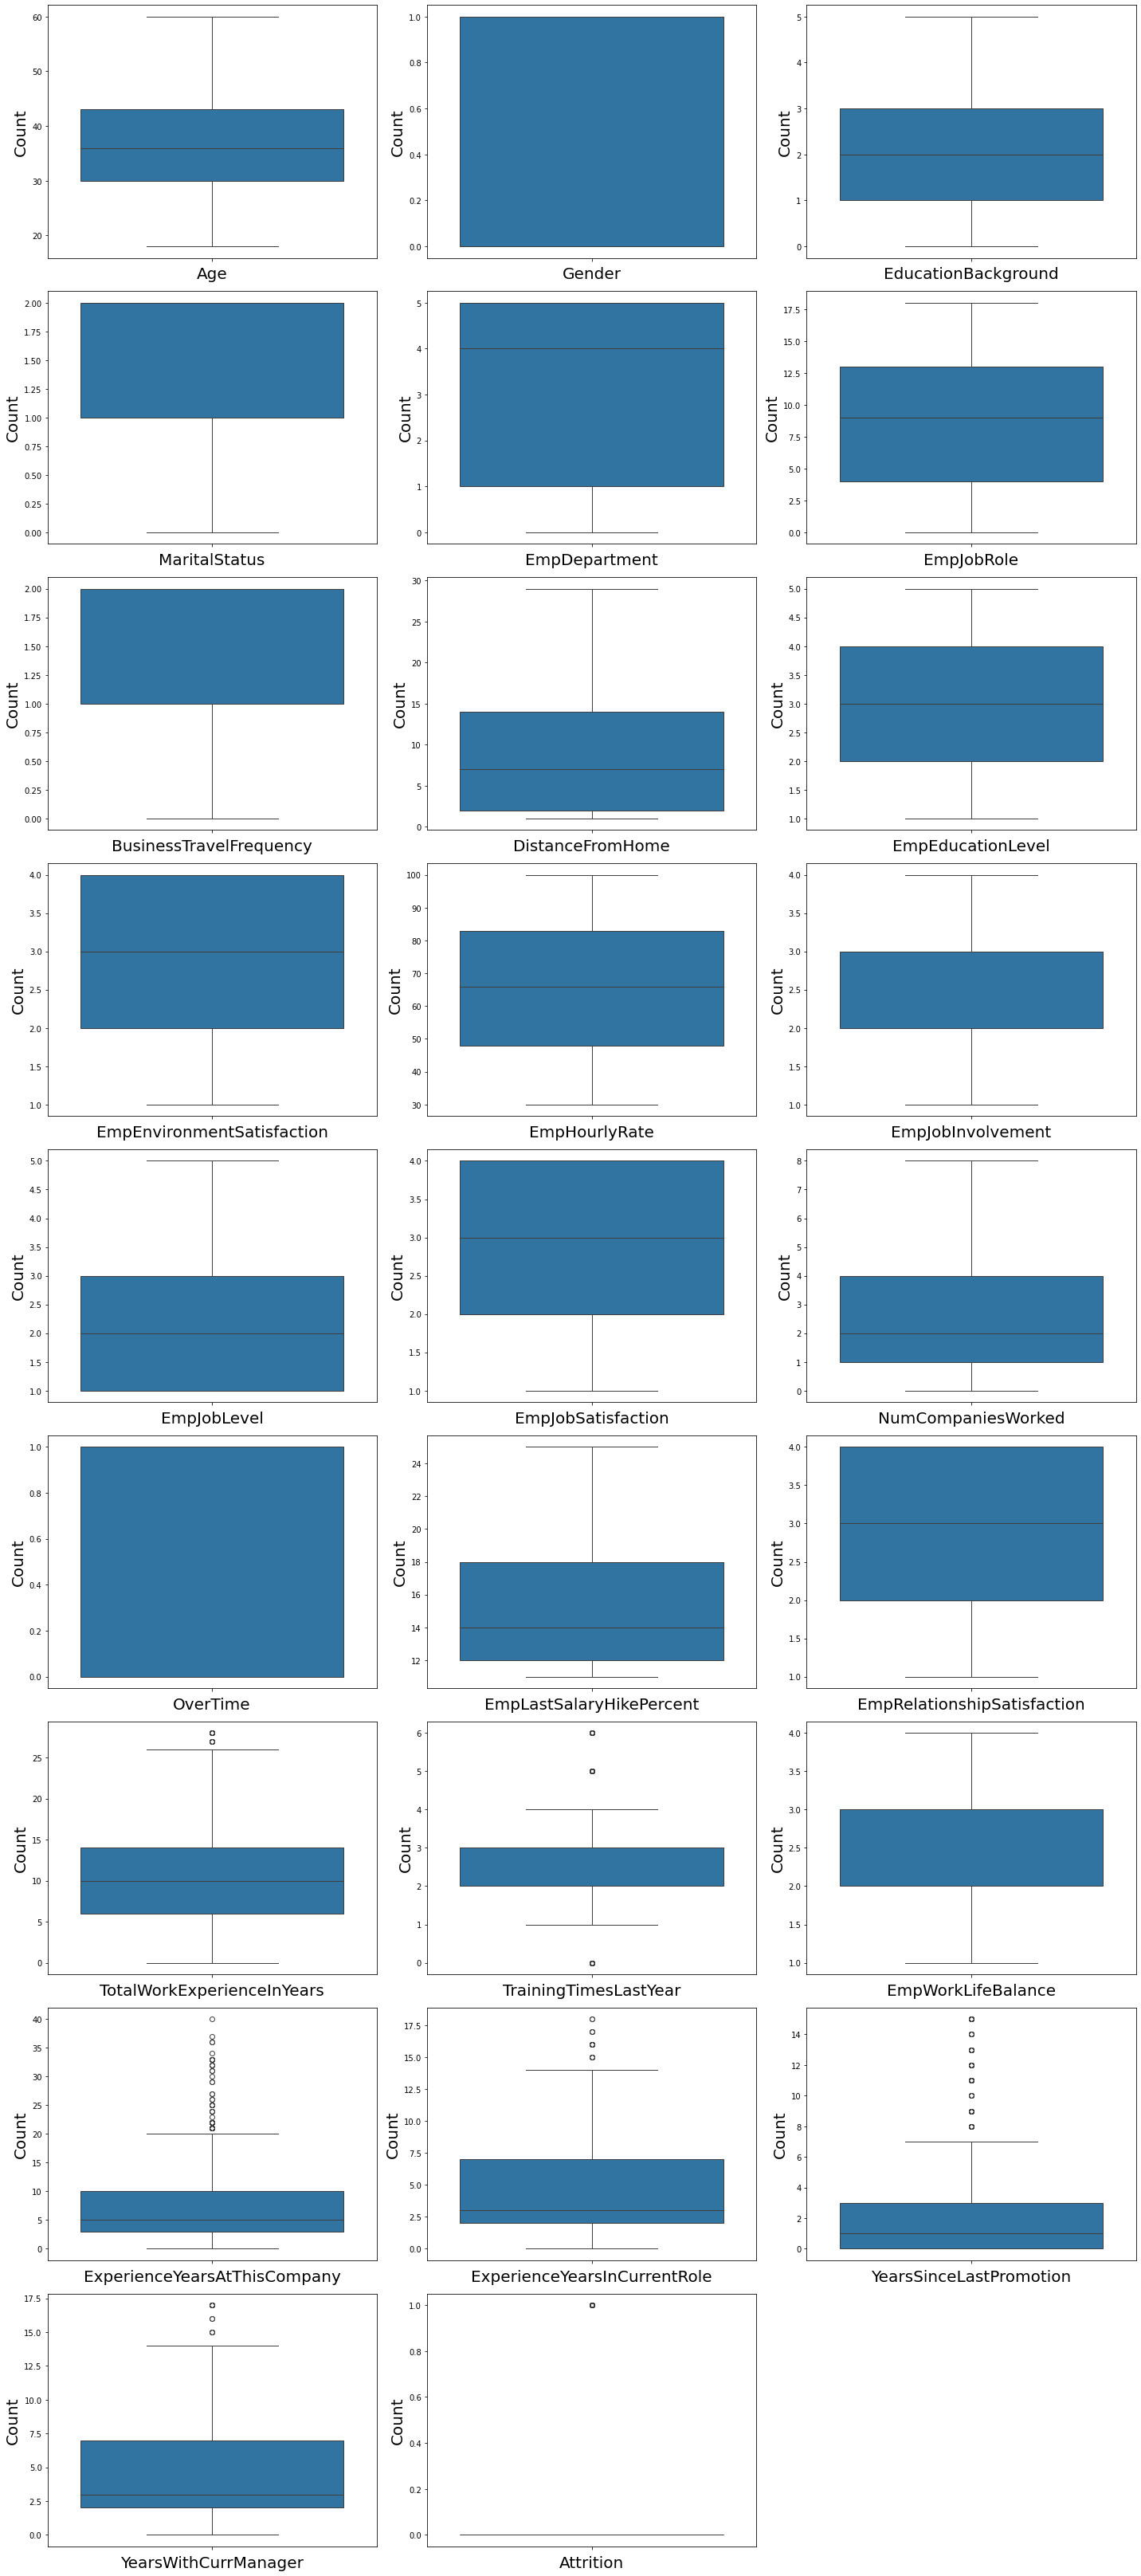

In [35]:
plt.figure(figsize=(20,45),facecolor='white')
plotnumber=1

for column in x:
    if plotnumber<=27:
        ax=plt.subplot(9,3,plotnumber)
        sns.boxplot(x[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

## FEATURE SELECTION

<Axes: >

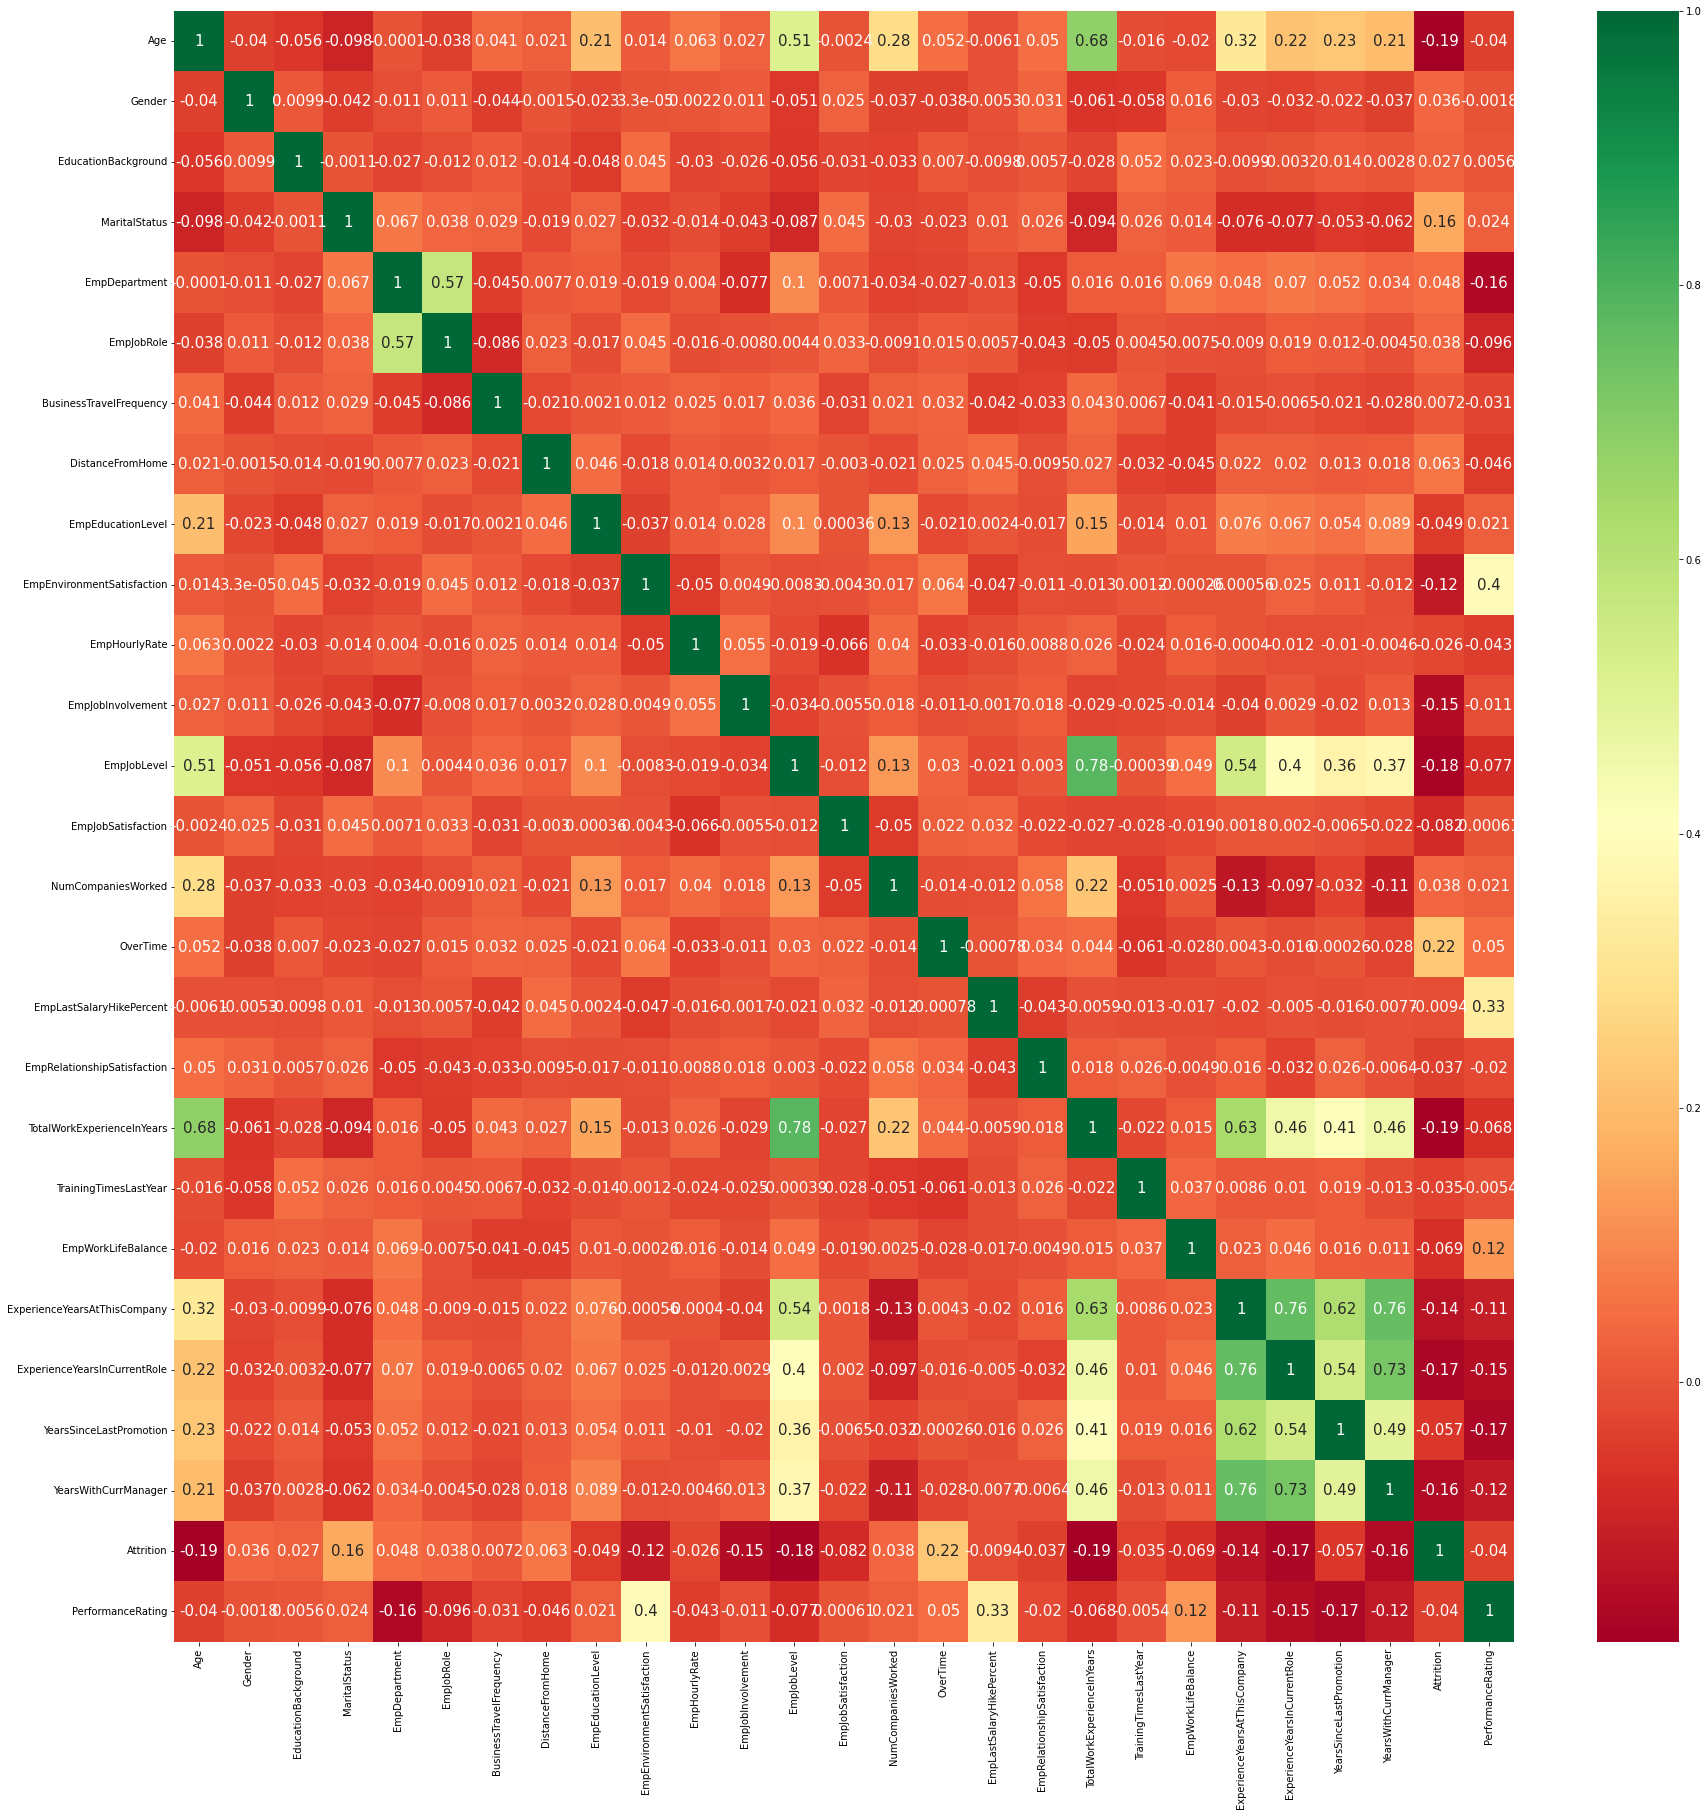

In [36]:
# Heatmap
# Checking correlation

plt.figure(figsize=(30, 30))#canvas size
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15}) #plotting heat map to check correlation

In [37]:
df.corr()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
Age,1.000000,-0.040107,-0.055905,-0.098368,-0.000104,-0.037665,0.040579,0.020937,0.207313,0.013814,0.062867,0.027216,0.509139,-0.002436,0.284408,0.051910,-0.006105,0.049749,0.680886,-0.016053,-0.019563,0.318852,0.217163,0.228199,0.205098,-0.189317,-0.040164
Gender,-0.040107,1.000000,0.009922,-0.042169,-0.010925,0.011332,-0.043608,-0.001507,-0.022960,0.000033,0.002218,0.010949,-0.050685,0.024680,-0.036675,-0.038410,-0.005319,0.030707,-0.061055,-0.057654,0.015793,-0.030392,-0.031823,-0.021575,-0.036643,0.035758,-0.001780
EducationBackground,-0.055905,0.009922,1.000000,-0.001097,-0.026874,-0.012325,0.012382,-0.013919,-0.047978,0.045028,-0.030234,-0.025505,-0.056338,-0.030977,-0.032879,0.007046,-0.009788,0.005652,-0.027929,0.051596,0.022890,-0.009887,-0.003215,0.014277,0.002767,0.027161,0.005607
MaritalStatus,-0.098368,-0.042169,-0.001097,1.000000,0.067272,0.038023,0.028520,-0.019148,0.026737,-0.032467,-0.013540,-0.043355,-0.087359,0.044593,-0.030095,-0.022833,0.010128,0.026410,-0.093537,0.026045,0.014154,-0.075728,-0.076663,-0.052951,-0.061908,0.162969,0.024172
EmpDepartment,-0.000104,-0.010925,-0.026874,0.067272,1.000000,0.568973,-0.045233,0.007707,0.019175,-0.019237,0.003957,-0.076988,0.100526,0.007150,-0.033950,-0.026841,-0.012661,-0.050286,0.016065,0.016438,0.068875,0.047677,0.069602,0.052315,0.033850,0.048006,-0.162615
EmpJobRole,-0.037665,0.011332,-0.012325,0.038023,0.568973,1.000000,-0.086251,0.022939,-0.016792,0.044612,-0.016179,-0.008034,0.004406,0.032916,-0.009111,0.015075,0.005735,-0.043067,-0.049529,0.004452,-0.007519,-0.009047,0.019383,0.012190,-0.004504,0.037508,-0.096209
BusinessTravelFrequency,0.040579,-0.043608,0.012382,0.028520,-0.045233,-0.086251,1.000000,-0.020935,0.002064,0.012267,0.025400,0.016652,0.036360,-0.031236,0.021476,0.032229,-0.041946,-0.032705,0.042736,0.006720,-0.040969,-0.015029,-0.006541,-0.020824,-0.028073,0.007217,-0.031025
DistanceFromHome,0.020937,-0.001507,-0.013919,-0.019148,0.007707,0.022939,-0.020935,1.000000,0.045856,-0.017719,0.013730,0.003231,0.017270,-0.003036,-0.021411,0.024940,0.044974,-0.009509,0.027306,-0.032082,-0.044788,0.021908,0.019898,0.013246,0.017860,0.063248,-0.046142
EmpEducationLevel,0.207313,-0.022960,-0.047978,0.026737,0.019175,-0.016792,0.002064,0.045856,1.000000,-0.037103,0.014095,0.027544,0.100734,0.000357,0.128674,-0.021119,0.002358,-0.016690,0.151062,-0.013674,0.010276,0.076332,0.066672,0.054313,0.088988,-0.049118,0.020529
EmpEnvironmentSatisfaction,0.013814,0.000033,0.045028,-0.032467,-0.019237,0.044612,0.012267,-0.017719,-0.037103,1.000000,-0.049501,0.004865,-0.008272,-0.004319,0.017270,0.064270,-0.047271,-0.010504,-0.012894,0.001192,-0.000262,-0.000561,0.025491,0.010732,-0.011702,-0.123490,0.395561


# Task 3: Top 3 Important Factors effecting employee performance

In [38]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Find the correlations with 'PerformanceRating' column
performance_corr = corr_matrix['PerformanceRating'].sort_values(ascending=False)

# Displaying the top 3 factors affecting employee performance
Top_3_factors = performance_corr[1:4]  # Exclude the 'PerformanceRating' column itself
print("Top 3 important factors affecting employee performance are:")
print(Top_3_factors)

Top 3 important factors affecting employee performance are:
EmpEnvironmentSatisfaction    0.395561
EmpLastSalaryHikePercent      0.333722
EmpWorkLifeBalance            0.124429
Name: PerformanceRating, dtype: float64


#### Insight
The top 3 important factors affecting the employee performamce are taken on the basis of employee environment satisfaction, employee last salary hike percentage and employee work life balance. 

EmpEnvironmentSatisfaction: It measures how satisfied an employee is with the physical and social aspects of their work environment.

EmpLastSalaryHikePercent: This is the percentage increase in an employee's salary during the most recent salary hike or adjustment.

EmpWorkLifeBalance : It measures how an employee perceives their ability to balance the demands of their job with other aspects of their life, such as family, personal interests, and leisure.

## MODEL CREATION

### Balancing the data

In [39]:
df.PerformanceRating.value_counts()#checking unique value in PerformanceRating column

PerformanceRating
1    874
0    194
2    132
Name: count, dtype: int64

In [40]:
## Balacing the data
from collections import Counter# importing counter to check count of each label
from imblearn.over_sampling import SMOTE #for balancing the data
sm=SMOTE()#object creation
print(Counter(y))# checking count for each class 
x_sm,y_sm=sm.fit_resample(x,y)#applying sampling on target variable 
print(Counter(y_sm))# checking count after sampling for  each class

Counter({1: 874, 0: 194, 2: 132})
Counter({1: 874, 2: 874, 0: 874})


In [41]:
## Preparing training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size=0.21, random_state=3)

In [42]:
x_train

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
1986,35,1,0,1,1,4,1,6,3,1,64,1,1,2,2,1,23,4,8,3,3,6,4,0,4,1
511,37,0,3,1,2,4,2,10,3,2,71,3,1,2,1,0,11,1,8,2,1,8,4,7,7,0
2613,45,0,1,1,4,8,0,1,1,3,73,2,3,2,3,0,23,3,25,2,2,23,15,14,4,0
1122,34,1,1,0,1,15,2,2,4,4,62,2,1,3,3,0,12,3,14,3,3,7,3,5,7,0
2594,47,0,1,1,1,18,1,7,3,1,76,3,1,2,4,0,17,3,9,1,2,2,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2304,42,0,4,1,4,12,0,9,3,3,37,3,1,3,2,0,22,1,9,1,2,6,3,3,3,0
968,33,0,1,1,1,3,2,5,4,3,63,2,1,4,1,0,13,3,2,2,2,2,2,0,2,0
1667,40,0,3,1,3,9,1,7,3,2,88,2,3,2,2,0,16,3,20,2,2,18,6,2,11,0
1688,31,0,2,0,4,8,1,4,2,1,61,3,1,3,7,0,12,1,4,0,2,2,2,1,2,0


In [43]:
y_train

1986    2
511     0
2613    2
1122    1
2594    2
       ..
2304    2
968     1
1667    0
1688    0
1898    2
Name: PerformanceRating, Length: 2071, dtype: int64

## 1) Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(x_train,y_train)  ## training

LogisticRegression()

In [45]:
y_pred=clf.predict(x_test)

In [46]:
y_pred

array([1, 1, 2, 2, 2, 0, 0, 0, 1, 1, 0, 2, 1, 0, 1, 0, 2, 2, 0, 1, 1, 2,
       1, 1, 2, 2, 2, 2, 1, 0, 0, 0, 2, 1, 2, 2, 0, 2, 1, 0, 1, 2, 1, 2,
       2, 1, 1, 2, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 2, 0, 2, 0, 0, 2, 0, 2,
       2, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 0, 1, 1, 1,
       2, 1, 0, 2, 0, 2, 1, 1, 1, 1, 0, 1, 0, 1, 2, 1, 0, 2, 1, 0, 0, 2,
       0, 0, 2, 1, 2, 2, 2, 2, 1, 0, 0, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 0, 0, 0, 2, 1, 2, 0, 1, 2, 2, 0, 2, 0, 1, 0, 2, 0, 0, 2,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 2, 2, 0, 1, 1, 1, 1, 1,
       1, 2, 0, 2, 2, 0, 1, 0, 1, 1, 0, 1, 2, 1, 2, 1, 2, 0, 2, 2, 1, 1,
       2, 1, 0, 1, 1, 1, 2, 1, 1, 2, 1, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0,
       1, 1, 1, 1, 2, 0, 2, 0, 1, 1, 1, 0, 2, 1, 0, 2, 0, 0, 0, 2, 0, 2,
       1, 1, 1, 2, 2, 0, 2, 2, 2, 1, 0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 1,
       1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 2, 0, 1, 0, 1, 1, 0, 1, 0, 1, 2, 2,
       2, 2, 2, 1, 0, 2, 1, 1, 0, 1, 2, 1, 0, 0, 0,

In [47]:
# checking accuracy score
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print('accuracy_score:- ',accuracy_score(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.84      0.84      0.84       184
           1       0.79      0.81      0.80       180
           2       0.88      0.86      0.87       187

    accuracy                           0.84       551
   macro avg       0.84      0.84      0.84       551
weighted avg       0.84      0.84      0.84       551

[[155  23   6]
 [ 19 145  16]
 [ 11  15 161]]
accuracy_score:-  0.8366606170598911


### Hyperparameter Tuning for Logistic Regression

In [48]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

# Define the Logistic Regression classifier
lr_hyperparameter = LogisticRegression(random_state=42)

In [49]:
# Define the hyperparameter grid for RandomizedSearchCV
param_dist = {
    'C': [0.001,0.01,0.1,0.5,0.8,1,10,50,100],  # Random float values for regularization parameter C
    'penalty': ['l1', 'l2'],  # Regularization type ('l1' for L1, 'l2' for L2)
    'solver': ['liblinear', 'saga'],  # Solver algorithms
}


# Create the RandomizedSearchCV instance for 'h1n1_vaccine'
random_search_lr = RandomizedSearchCV(
    lr_hyperparameter, param_distributions=param_dist, n_iter=10, cv=3, n_jobs=-1, random_state=42
)


# Fit the models to find the best hyperparameters for 'h1n1_vaccine'
random_search_lr.fit(x_train , y_train)
print("Best Hyperparameters:")
print(random_search_lr.best_params_)

Best Hyperparameters:
{'solver': 'liblinear', 'penalty': 'l2', 'C': 50}


In [50]:
best_lr_classifier = random_search_lr.best_estimator_
accuracy = best_lr_classifier.score(x_test, y_test)
print("Accuracy on Test Data:", accuracy)

Accuracy on Test Data: 0.8802177858439202


## 2) Decision Tree Classifier

In [51]:
from sklearn.tree import DecisionTreeClassifier  
from sklearn.model_selection import GridSearchCV

# import Decision Tree
tree = DecisionTreeClassifier(random_state=2)           # make object of Decision Tree
tree.fit(x_train,y_train)                                # Train Decision Tree
y_pr_tree = tree.predict(x_test)                         # make prediction

In [52]:
# classification report
print(classification_report(y_test,y_pr_tree))
# Check performance
acc_tree = accuracy_score(y_test,y_pr_tree)
print("Accuracy Score of Decision Tree : ",acc_tree)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       184
           1       0.95      0.92      0.93       180
           2       0.96      0.96      0.96       187

    accuracy                           0.95       551
   macro avg       0.95      0.95      0.95       551
weighted avg       0.95      0.95      0.95       551

Accuracy Score of Decision Tree :  0.9546279491833031


###  HYPER PRAMETER TUNNING

In [53]:
# creating dictionary--> key value pair of hyperparameters having key as parameter and values as its values
Tree_Hyperpara ={ 
    'criterion': ['gini', 'entropy'],                # Split criterion
    'max_depth': [None,range(1, 20)],                # Maximum depth of the tree
    'splitter': ['best', 'random'],                  # Strategy for choosing the split at each node
    'max_features': ['auto', 'sqrt', 'log2', None],  # Number of features to consider at each split
    'min_samples_split': [2, 5, 10],                 # Minimum samples required to split a node
    'min_samples_leaf': list(range(1, 11))           # Minimum samples required at a leaf node
}


# Perform grid search with cross-validation
Tree_grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=2),
                               param_grid=Tree_Hyperpara,      # hyperparametes(dictionary we created)
                               cv=3,                           # no of folds
                               scoring='accuracy',             # performance matrix to check performance
                               n_jobs=-1,
                               verbose=1)

#training data on gridsearch cv
Tree_grid_search.fit(x_train,y_train)                           

# print best score and parameters
print("Best Accuracy:", Tree_grid_search.best_score_)
print("Best Hyperparameters:", Tree_grid_search.best_params_)

Fitting 3 folds for each of 960 candidates, totalling 2880 fits
Best Accuracy: 0.897636275928606
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'best'}


In [54]:
# Train Decission Tree with Best parameters
tree_hyp = DecisionTreeClassifier(criterion='entropy',max_depth=None,max_features=None,
                                  min_samples_leaf=2,min_samples_split=2,splitter='best')             
tree_hyp.fit(x_train,y_train)                                
y_hyp_tree = tree_hyp.predict(x_test)                           

# check performance of Decision Tree model
acc_hyp_tree = accuracy_score(y_test,y_hyp_tree)
print("Accuracy of Decision Tree after Hyperparameter : ",acc_hyp_tree)

Accuracy of Decision Tree after Hyperparameter :  0.9382940108892922


## 3) Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier    # import random forest classifier
forest = RandomForestClassifier(random_state=1)        # create a variable 
forest.fit(x_train,y_train)                            # train random forest
y_pr_forest = forest.predict(x_test)                   # make prediction

In [56]:
# classification report
print(classification_report(y_test,y_pr_forest))

# Check Performance
acc_forest = accuracy_score(y_test,y_pr_forest)
print("Accuracy of Random Forest :  ",acc_forest)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       184
           1       0.96      0.95      0.96       180
           2       0.98      0.98      0.98       187

    accuracy                           0.97       551
   macro avg       0.97      0.97      0.97       551
weighted avg       0.97      0.97      0.97       551

Accuracy of Random Forest :   0.969147005444646


### Hyperparameter Tunning for Random Forest Classifier

In [57]:
# create a dictionary of hyperparameters with values
Forest_Hyperparameter = {
    'n_estimators': [50, 100, 200,300,400,500],        # Number of trees in the forest
    'max_depth': [None, range(1,20)],                  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],                   # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],                     # Minimum samples required at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']          # Number of features to consider when splitting
}

# Perform grid search with cross-validation
forest_random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=31),
                                         param_distributions=Forest_Hyperparameter,   
                                         n_iter=100,
                                         n_jobs=-1,
                                         scoring='accuracy' ,                      
                                         cv=3,
                                         verbose=3,random_state=0)

# Train random random search
forest_random_search.fit(x_train,y_train)

# print best parameters and score
print("Best Score:", forest_random_search.best_score_)
print("Best Hyperparameters:", forest_random_search.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Score: 0.9541244573082489
Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}


In [58]:
# Train random forest model with best parameters 
hyp_forest = RandomForestClassifier(n_estimators=50,min_samples_split=2,min_samples_leaf=1,
                                max_features='log2',max_depth=None)
hyp_forest.fit(x_train,y_train)
y_hyp_forest = hyp_forest.predict(x_test)

# Check Performance
acc_hyp_forest = accuracy_score(y_test,y_hyp_forest)
print("Accuracy of Random Forest After Hyperparameter Tunning : ",acc_hyp_forest)

Accuracy of Random Forest After Hyperparameter Tunning :  0.969147005444646


## 4) MLP Classifier

In [59]:
# Import MLP classifier and train with best parameters and make prediction for y_pred
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(random_state=1,hidden_layer_sizes=(255),activation='relu',alpha=0.1,learning_rate='constant')
ann.fit(x_train,y_train)
y_pr_ann = ann.predict(x_test)

In [60]:
# check performance of MLPClassifier
print(classification_report(y_test,y_pr_ann))

acc_ann = accuracy_score(y_test,y_pr_ann)
print(f"Accuracy Score of MLPClassifier : {acc_ann}")

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       184
           1       0.92      0.94      0.93       180
           2       0.97      0.94      0.95       187

    accuracy                           0.94       551
   macro avg       0.94      0.94      0.94       551
weighted avg       0.94      0.94      0.94       551

Accuracy Score of MLPClassifier : 0.9401088929219601


## 5) KNN

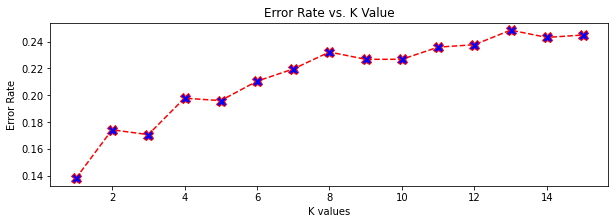

In [61]:
# taking optimal k to determine how many nearest neighbors  required to create model

from sklearn.neighbors import KNeighborsClassifier               # import KNeighborsClassifier
Error_rate = []                                                  # create a list to store erroe for each k value
for K in range(1,16):                                            # use for loop to iterate from 1 to 16.
    model = KNeighborsClassifier(n_neighbors=K)                  # create model
    model.fit(x_train,y_train)                                   # train model
    y_pred = model.predict(x_test)                               # predict X_test
    Error_rate.append(np.mean(y_pred != y_test))                 # append error in empty list
    

# plot a graph between K values and Error Rate
plt.figure(figsize=(10,3))
plt.plot(range(1,16),Error_rate,linestyle='dashed',color='red',marker='X',markerfacecolor='blue',markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K values')
plt.ylabel('Error Rate')
plt.show()

In [62]:
knn = KNeighborsClassifier(n_neighbors=2)                  # define KNN model
knn.fit(x_train,y_train)                                   # train KNN model
y_pr_knn = knn.predict(x_test)                             # make prediction for test data
acc_knn = accuracy_score(y_pr_knn,y_test)                  # check performance
print("Accuracy of K nearest Neighbour : ",acc_knn)

Accuracy of K nearest Neighbour :  0.8257713248638838


In [63]:
# print classification report
print(classification_report(y_test,y_pr_knn))


              precision    recall  f1-score   support

           0       0.70      1.00      0.83       184
           1       0.98      0.48      0.65       180
           2       0.92      0.98      0.95       187

    accuracy                           0.83       551
   macro avg       0.87      0.82      0.81       551
weighted avg       0.87      0.83      0.81       551



## 6. Gradient Boosting 

In [64]:
gbm = GradientBoostingClassifier()
gbm.fit(x_train,y_train)

GradientBoostingClassifier()

In [65]:
y_pred_gbm = gbm.predict(x_test)

In [66]:
# Print the accuracy score by comparing the actual y_test values with the predicted y values
accuracy_gb = accuracy_score(y_test, y_pred_gbm)
print("Accuracy Score of Gradient Boosting:", accuracy_gb)

# The classification report provides a summary of the model's performance for each class
report_gb = classification_report(y_test, y_pred_gbm)
print("Classification Report of Gradient Boosting:")
print(report_gb)

Accuracy Score of Gradient Boosting: 0.9673321234119783
Classification Report of Gradient Boosting:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       184
           1       0.95      0.96      0.95       180
           2       0.98      0.97      0.97       187

    accuracy                           0.97       551
   macro avg       0.97      0.97      0.97       551
weighted avg       0.97      0.97      0.97       551



## 7) XGBClassifier

In [68]:
XGB = XGBClassifier()
XGB.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [69]:
y_pred_gbm = XGB.predict(x_test)

In [70]:
# Print the accuracy score by comparing the actual y_test values with the predicted y values
accuracy_gb = accuracy_score(y_test, y_pred_gbm)
print("Accuracy Score of XGBoosting:", accuracy_gb)

# The classification report provides a summary of the model's performance for each class
report_gb = classification_report(y_test, y_pred_gbm)
print("Classification Report of XGBoosting:")
print(report_gb)

Accuracy Score of XGBoosting: 0.9782214156079855
Classification Report of XGBoosting:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       184
           1       0.97      0.96      0.97       180
           2       0.98      0.98      0.98       187

    accuracy                           0.98       551
   macro avg       0.98      0.98      0.98       551
weighted avg       0.98      0.98      0.98       551



# **Model Performance**

### **Accuracy score comparison chart**

In [2]:
from tabulate import tabulate
my_data=[['1) Logistic Regression','0.88'],
         ['2) Decision Tree','0.93'],
        ['3) Random Forest Classifier','0.97'],
         ['4) MLP Classifier','0.94'],
        ['5)K-Nearest Neighbor','0.82'], 
         ['6) Gradient Boosting Classifier','0.97'],
         ['7) XGB Classifier','0.978']]
head=['Model Evaluation','Accuracy']
print(tabulate(my_data,headers=head,tablefmt='grid'))

+---------------------------------+------------+
| Model Evaluation                |   Accuracy |
+=================================+============+
| 1) Logistic Regression          |      0.88  |
+---------------------------------+------------+
| 2) Decision Tree                |      0.93  |
+---------------------------------+------------+
| 3) Random Forest Classifier     |      0.97  |
+---------------------------------+------------+
| 4) MLP Classifier               |      0.94  |
+---------------------------------+------------+
| 5)K-Nearest Neighbor            |      0.82  |
+---------------------------------+------------+
| 6) Gradient Boosting Classifier |      0.97  |
+---------------------------------+------------+
| 7) XGB Classifier               |      0.978 |
+---------------------------------+------------+


### Result

1. The XGB classifier stand out with high accuracies, indicating their effectiveness in the given task.
   Hence accuracy of XGB classifier 0.978.
   

- Data Analysis Report
    * Data Overview
        * Type:Supervised
        * Predictor Variables:
            - Ordinal
            - A few nominal
        * Target Variable:
            -'Performance Rating'(Ordinal)

- Data Processing Techniques
    * Encoding:
        - Label Encoding
    * Standardization:
        - Applied for consistent scale
        
- Correlation Analysis
    * Method Used:
        - Correlation Coefficient
    * Insights:
        - Evaluate realtionshiop between variables
        
- Important Features
    * Selected Feature
        - Department
        - Job Role
        - Environment Satisfaction
        - Last Salary Hike Percentage
        - Work Life Balance
        - Experience Years At this Company
        - Experience years In Current Role
        - Years Since Last Promotion
        - Years With Current Manger

- Machine Learning Models
    * Algorithms Used:
        - Logistic Regression
        - Decision Tree classifier
        - Random Forest classifier
        - MLP Classifier
        - K-Nearest Neighbor
        - Gradient Boosting Tech
        - XGBoosting
    * Objective:
        - Train models for target prediction
        
- Department-Wise Performance Analysis
    * Scope: 
        - Evaluate performance variations across
    * Insights:
        - Identify department-specific Trends

- Conclusion
    * Key Findings:
        - Identified important predictors for employee performance
        - Applied various algorithms for target Prediction
        - Conducted department-wise performance analysis


- **Recommendation**
    - **The top 3 features effecting employee performances are:** 
        - Employee Environment Satisfaction 
        - Employee Last Salary Hike Percent 
        - Years since last promotion
    - Our findings reveal a clear connection between a supportive work environment and employee performance. Offering competitive compensation and promoting work-life balance are crucial elements in fostering employee success.  However, maintaining stable leadership is equally important, as frequent managerial changes can disrupt this positive influence.
    - This suggests that creating a holistic approach to employee support, encompassing both financial and non-financial factors, is essential for optimizing individual performance and achieving organizational objectives.